In [122]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np

### Initialize Data

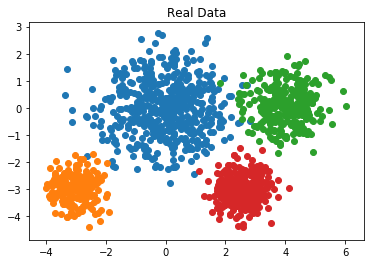

In [273]:
x1=np.random.normal(size=500)
y1=np.random.normal(size=500)

x2=np.random.normal(loc=-3, scale=0.5, size=200)
y2=np.random.normal(loc=-3, scale=0.5, size=200)

x3=np.random.normal(loc=4, scale=0.7, size=300)
y3=np.random.normal(scale=0.7, size=300)

x4=np.random.normal(loc=2.5, scale=0.5, size=300)
y4=np.random.normal(loc=-3, scale=0.5, size=300)

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.scatter(x4,y4)

plt.title('Real Data')
plt.show()

### Mix data for future processing

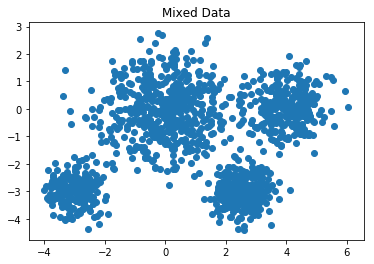

In [274]:
x=np.hstack((x1,x2,x3,x4))
y=np.hstack((y1,y2,y3,y4))
cords=np.column_stack((x,y))

data_size=cords.shape[0]
data_dim=cords.shape[1]

plt.scatter(cords[:,0],cords[:,1])
plt.title('Mixed Data')
plt.show()

### Initialize $ \mu $-s using K-means++

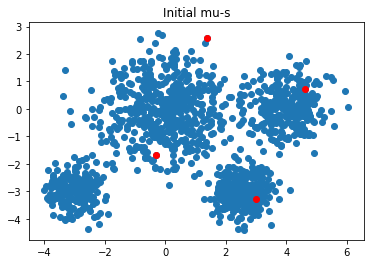

In [277]:
k=4 # number of classes

mu=np.zeros([k,data_dim])
any_number=randint(0,data_size)

mu[0]=cords[any_number] # first mu

for i in range(1,k):
    dists=np.zeros([data_size,i])
    for j in range(i):
        dists[:,j]=((cords - np.array(mu[j])) ** 2).sum(axis = 1)
        
    w=dists.min(axis=1) # weights
    p=np.rint((w*100)/(w.mean())) # probabilities
    
    n_p=np.column_stack((np.arange(len(p)),p)).tolist() # attach numbers
    
    enlarged_n_p=[]
    for j in range(data_size):
        enlarged_n_p+=[n_p[j]]*int(n_p[j][1])
    any_number=int(randint(0,len(enlarged_n_p)))
    mu[i]=cords[int(enlarged_n_p[any_number][0])]
    
plt.scatter(cords[:,0],cords[:,1])
plt.scatter(mu[:,0],mu[:,1], color='r')
plt.title('Initial mu-s')
plt.show()

### Training

0


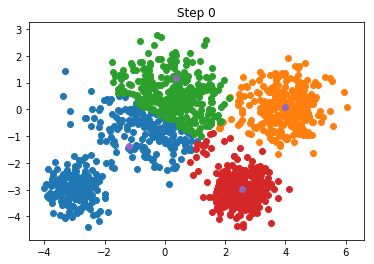

1


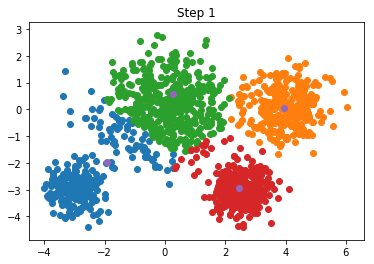

2


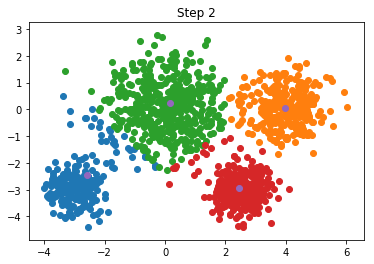

3


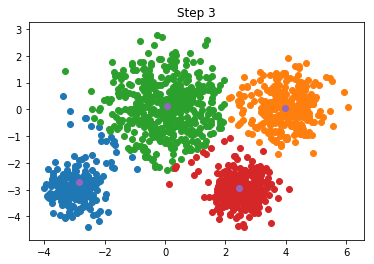

4


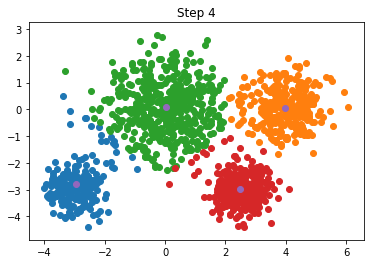

In [278]:
iters=5

for i in range(iters):
    print(i)
    inv_dists=np.zeros([data_size,k])
    
    if i == 0:
        for j in range(k):
            inv_dists[:,j] = 1/(((cords - mu[j]) ** 2).sum(axis = 1)+1e-10)
            
        r=inv_dists/inv_dists.max(axis = 1).reshape(len(inv_dists),1)
        r=r-(r%1.0)
    
    for j in range(k):
        mu[j]=(r[:,j].reshape(len(r),1)*cords).sum(axis=0)/(r[:,j].sum(axis=0))
        inv_dists[:,j] = 1/(((cords - mu[j]) ** 2).sum(axis = 1)+1e-10)
        
    r=inv_dists/(inv_dists.max(axis = 1).reshape(len(inv_dists),1))
    r=r-(r%1.0)
    
    pr=[]
    for j in range(k):
        pr.append(cords[r[:,j]==1])
    
    for j in range(k):
        plt.scatter(pr[j][:,0],pr[j][:,1])

    plt.scatter(mu[:,0],mu[:,1])
    plt.title('Step {}'.format(i))
    plt.show()